In [21]:
from jmetal.algorithm.multiobjective.moead import MOEAD
from jmetal.algorithm.multiobjective.nsgaii import NSGAII
from jmetal.algorithm.multiobjective.smpso import SMPSO
from jmetal.core.quality_indicator import *
from jmetal.lab.experiment import Experiment, Job, generate_summary_from_experiment
from jmetal.operator import PolynomialMutation, SBXCrossover, DifferentialEvolutionCrossover
from jmetal.problem import ZDT1, ZDT2, ZDT3, ZDT4, ZDT6
from jmetal.util.archive import CrowdingDistanceArchive
from jmetal.util.termination_criterion import StoppingByEvaluations


def configure_experiment(problems: dict, n_run: int):
    jobs = []
    max_evaluations = 25000

    for run in range(n_run):
        for problem_tag, problem in problems.items():
            jobs.append(
                Job(
                    algorithm=NSGAII(
                        problem=problem,
                        population_size=200,
                        offspring_population_size=100,
                        mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables,
                                                    distribution_index=20),
                        crossover=SBXCrossover(probability=1.0, distribution_index=20),
                        termination_criterion=StoppingByEvaluations(max=max_evaluations)
                    ),
                    algorithm_tag='NSGAII',
                    problem_tag=problem_tag,
                    run=run,
                )
            )
            jobs.append(
                Job(
                    algorithm=MOEAD(
                        problem=problem,
                        population_size=200,
                        crossover=DifferentialEvolutionCrossover(CR=1.0, F=0.5, K=0.5),
                        mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables, distribution_index=20),
                        aggregative_function=Tschebycheff(dimension=problem.number_of_objectives),
                        neighbor_size=20,
                        neighbourhood_selection_probability=0.9,
                        max_number_of_replaced_solutions=2,
                        weight_files_path='jMetalPy/resources/MOEAD_weights',
                        termination_criterion=StoppingByEvaluations(max=max_evaluations)
                    ),
                    algorithm_tag='MOEAD',
                    problem_tag=problem_tag,
                    run=run,
                )
            )

    return jobs

# Configure the experiments
jobs = configure_experiment(problems={'ZDT1': ZDT1(), 'ZDT2': ZDT2(), 'ZDT3': ZDT3(), 'ZDT4': ZDT4(), 'ZDT6': ZDT6()}, n_run=30)

# Run the study
output_directory = 'data'
experiment = Experiment(output_dir=output_directory, jobs=jobs)
experiment.run()

2019-12-09 17:50:38,668 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT1\FUN.0.tsv
2019-12-09 17:50:38,670 [MainThread  ] [INFO ]  Output file (variables): data\NSGAII\ZDT1\VAR.0.tsv
2019-12-09 17:50:46,125 [MainThread  ] [INFO ]  Output file (function values): data\MOEAD\ZDT1\FUN.0.tsv
2019-12-09 17:50:46,127 [MainThread  ] [INFO ]  Output file (variables): data\MOEAD\ZDT1\VAR.0.tsv
2019-12-09 17:51:07,055 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT2\FUN.0.tsv
2019-12-09 17:51:07,057 [MainThread  ] [INFO ]  Output file (variables): data\NSGAII\ZDT2\VAR.0.tsv
2019-12-09 17:51:14,160 [MainThread  ] [INFO ]  Output file (function values): data\MOEAD\ZDT2\FUN.0.tsv
2019-12-09 17:51:14,162 [MainThread  ] [INFO ]  Output file (variables): data\MOEAD\ZDT2\VAR.0.tsv
2019-12-09 17:51:34,859 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT3\FUN.0.tsv
2019-12-09 17:51:34,861 [MainThread  ] [INFO ]  Output file (variables): d

2019-12-09 17:59:49,649 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT1\FUN.4.tsv
2019-12-09 17:59:49,651 [MainThread  ] [INFO ]  Output file (variables): data\NSGAII\ZDT1\VAR.4.tsv
2019-12-09 17:59:56,775 [MainThread  ] [INFO ]  Output file (function values): data\MOEAD\ZDT1\FUN.4.tsv
2019-12-09 17:59:56,777 [MainThread  ] [INFO ]  Output file (variables): data\MOEAD\ZDT1\VAR.4.tsv
2019-12-09 18:00:16,736 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT2\FUN.4.tsv
2019-12-09 18:00:16,738 [MainThread  ] [INFO ]  Output file (variables): data\NSGAII\ZDT2\VAR.4.tsv
2019-12-09 18:00:23,421 [MainThread  ] [INFO ]  Output file (function values): data\MOEAD\ZDT2\FUN.4.tsv
2019-12-09 18:00:23,423 [MainThread  ] [INFO ]  Output file (variables): data\MOEAD\ZDT2\VAR.4.tsv
2019-12-09 18:00:43,356 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT3\FUN.4.tsv
2019-12-09 18:00:43,358 [MainThread  ] [INFO ]  Output file (variables): d

2019-12-09 18:08:36,417 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT1\FUN.8.tsv
2019-12-09 18:08:36,419 [MainThread  ] [INFO ]  Output file (variables): data\NSGAII\ZDT1\VAR.8.tsv
2019-12-09 18:08:44,445 [MainThread  ] [INFO ]  Output file (function values): data\MOEAD\ZDT1\FUN.8.tsv
2019-12-09 18:08:44,448 [MainThread  ] [INFO ]  Output file (variables): data\MOEAD\ZDT1\VAR.8.tsv
2019-12-09 18:09:06,705 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT2\FUN.8.tsv
2019-12-09 18:09:06,707 [MainThread  ] [INFO ]  Output file (variables): data\NSGAII\ZDT2\VAR.8.tsv
2019-12-09 18:09:14,494 [MainThread  ] [INFO ]  Output file (function values): data\MOEAD\ZDT2\FUN.8.tsv
2019-12-09 18:09:14,496 [MainThread  ] [INFO ]  Output file (variables): data\MOEAD\ZDT2\VAR.8.tsv
2019-12-09 18:09:35,565 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT3\FUN.8.tsv
2019-12-09 18:09:35,567 [MainThread  ] [INFO ]  Output file (variables): d

2019-12-09 18:17:50,679 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT1\FUN.12.tsv
2019-12-09 18:17:50,682 [MainThread  ] [INFO ]  Output file (variables): data\NSGAII\ZDT1\VAR.12.tsv
2019-12-09 18:17:57,886 [MainThread  ] [INFO ]  Output file (function values): data\MOEAD\ZDT1\FUN.12.tsv
2019-12-09 18:17:57,888 [MainThread  ] [INFO ]  Output file (variables): data\MOEAD\ZDT1\VAR.12.tsv
2019-12-09 18:18:18,223 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT2\FUN.12.tsv
2019-12-09 18:18:18,226 [MainThread  ] [INFO ]  Output file (variables): data\NSGAII\ZDT2\VAR.12.tsv
2019-12-09 18:18:25,013 [MainThread  ] [INFO ]  Output file (function values): data\MOEAD\ZDT2\FUN.12.tsv
2019-12-09 18:18:25,015 [MainThread  ] [INFO ]  Output file (variables): data\MOEAD\ZDT2\VAR.12.tsv
2019-12-09 18:18:45,567 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT3\FUN.12.tsv
2019-12-09 18:18:45,569 [MainThread  ] [INFO ]  Output file (vari

2019-12-09 18:27:03,817 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT1\FUN.16.tsv
2019-12-09 18:27:03,819 [MainThread  ] [INFO ]  Output file (variables): data\NSGAII\ZDT1\VAR.16.tsv
2019-12-09 18:27:11,690 [MainThread  ] [INFO ]  Output file (function values): data\MOEAD\ZDT1\FUN.16.tsv
2019-12-09 18:27:11,692 [MainThread  ] [INFO ]  Output file (variables): data\MOEAD\ZDT1\VAR.16.tsv
2019-12-09 18:27:32,338 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT2\FUN.16.tsv
2019-12-09 18:27:32,341 [MainThread  ] [INFO ]  Output file (variables): data\NSGAII\ZDT2\VAR.16.tsv
2019-12-09 18:27:39,491 [MainThread  ] [INFO ]  Output file (function values): data\MOEAD\ZDT2\FUN.16.tsv
2019-12-09 18:27:39,494 [MainThread  ] [INFO ]  Output file (variables): data\MOEAD\ZDT2\VAR.16.tsv
2019-12-09 18:28:00,365 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT3\FUN.16.tsv
2019-12-09 18:28:00,367 [MainThread  ] [INFO ]  Output file (vari

2019-12-09 18:36:09,177 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT1\FUN.20.tsv
2019-12-09 18:36:09,179 [MainThread  ] [INFO ]  Output file (variables): data\NSGAII\ZDT1\VAR.20.tsv
2019-12-09 18:36:16,931 [MainThread  ] [INFO ]  Output file (function values): data\MOEAD\ZDT1\FUN.20.tsv
2019-12-09 18:36:16,933 [MainThread  ] [INFO ]  Output file (variables): data\MOEAD\ZDT1\VAR.20.tsv
2019-12-09 18:36:37,476 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT2\FUN.20.tsv
2019-12-09 18:36:37,478 [MainThread  ] [INFO ]  Output file (variables): data\NSGAII\ZDT2\VAR.20.tsv
2019-12-09 18:36:44,154 [MainThread  ] [INFO ]  Output file (function values): data\MOEAD\ZDT2\FUN.20.tsv
2019-12-09 18:36:44,156 [MainThread  ] [INFO ]  Output file (variables): data\MOEAD\ZDT2\VAR.20.tsv
2019-12-09 18:37:04,215 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT3\FUN.20.tsv
2019-12-09 18:37:04,217 [MainThread  ] [INFO ]  Output file (vari

2019-12-09 18:45:05,441 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT1\FUN.24.tsv
2019-12-09 18:45:05,443 [MainThread  ] [INFO ]  Output file (variables): data\NSGAII\ZDT1\VAR.24.tsv
2019-12-09 18:45:12,653 [MainThread  ] [INFO ]  Output file (function values): data\MOEAD\ZDT1\FUN.24.tsv
2019-12-09 18:45:12,655 [MainThread  ] [INFO ]  Output file (variables): data\MOEAD\ZDT1\VAR.24.tsv
2019-12-09 18:45:33,433 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT2\FUN.24.tsv
2019-12-09 18:45:33,435 [MainThread  ] [INFO ]  Output file (variables): data\NSGAII\ZDT2\VAR.24.tsv
2019-12-09 18:45:40,266 [MainThread  ] [INFO ]  Output file (function values): data\MOEAD\ZDT2\FUN.24.tsv
2019-12-09 18:45:40,268 [MainThread  ] [INFO ]  Output file (variables): data\MOEAD\ZDT2\VAR.24.tsv
2019-12-09 18:46:00,236 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT3\FUN.24.tsv
2019-12-09 18:46:00,238 [MainThread  ] [INFO ]  Output file (vari

2019-12-09 18:54:02,179 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT1\FUN.28.tsv
2019-12-09 18:54:02,182 [MainThread  ] [INFO ]  Output file (variables): data\NSGAII\ZDT1\VAR.28.tsv
2019-12-09 18:54:09,468 [MainThread  ] [INFO ]  Output file (function values): data\MOEAD\ZDT1\FUN.28.tsv
2019-12-09 18:54:09,470 [MainThread  ] [INFO ]  Output file (variables): data\MOEAD\ZDT1\VAR.28.tsv
2019-12-09 18:54:29,551 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT2\FUN.28.tsv
2019-12-09 18:54:29,553 [MainThread  ] [INFO ]  Output file (variables): data\NSGAII\ZDT2\VAR.28.tsv
2019-12-09 18:54:36,232 [MainThread  ] [INFO ]  Output file (function values): data\MOEAD\ZDT2\FUN.28.tsv
2019-12-09 18:54:36,234 [MainThread  ] [INFO ]  Output file (variables): data\MOEAD\ZDT2\VAR.28.tsv
2019-12-09 18:54:56,722 [MainThread  ] [INFO ]  Output file (function values): data\NSGAII\ZDT3\FUN.28.tsv
2019-12-09 18:54:56,724 [MainThread  ] [INFO ]  Output file (vari

In [22]:
# Generate summary file
generate_summary_from_experiment(
    input_dir=output_directory,
    reference_fronts='jMetalPy/resources/reference_front',
    quality_indicators=[GenerationalDistance(), EpsilonIndicator(), HyperVolume([1.0, 1.0])]
)

In [27]:
from jmetal.lab.experiment import generate_boxplot, generate_latex_tables, compute_mean_indicator, compute_wilcoxon
from jmetal.lab.statistical_test.bayesian import *
from jmetal.lab.statistical_test.functions import *
from jmetal.lab.visualization import CDplot, plot_posterior

# Generate Median & IQR tables
generate_latex_tables(filename='QualityIndicatorSummary.csv')

# Generate boxplots
generate_boxplot(filename='QualityIndicatorSummary.csv')

# Wilcoxon
compute_wilcoxon(filename='QualityIndicatorSummary.csv')

# Statistical lab

avg = compute_mean_indicator(filename='QualityIndicatorSummary.csv', indicator_name='HV')
print(avg)

# Non-parametric test
print('-------- Sign Test --------')
print(sign_test(avg[['NSGAII', 'MOEAD']]))
print('-------- Friedman Test --------')
print(friedman_test(avg))
print('-------- Friedman Aligned Rank Test --------')
print(friedman_aligned_rank_test(avg))
print('-------- Quade Test --------')
print(quade_test(avg))

# Post-hoc tests
print('-------- Friedman Post-Hoc Test --------')
z, p_val, adj_pval = friedman_ph_test(avg, control=0, apv_procedure='Bonferroni')
print('z values \n', z)
print('p-values \n', p_val)
print('adjusted p-values \n', adj_pval)
print('-------- Friedman Aligned Rank Post-Hoc Test --------')
z, p_val, adj_pval = friedman_aligned_ph_test(avg, apv_procedure='Shaffer')
print('z values \n', z)
print('p-values \n', p_val)
print('adjusted p-values \n', adj_pval)
print('-------- QuadeTest Post-Hoc Test --------')
z, p_val, adj_pval = quade_ph_test(avg, apv_procedure='Holm')
print('z values \n', z)
print('p-values \n', p_val)
print('adjusted p-values \n', adj_pval)

# Plot critical distance

#CDplot(avg.T, alpha=0.15, higher_is_better=True)

print('-------- Bayesian Sign Test --------')
bst, DProcess = bayesian_sign_test(avg[['NSGAII', 'MOEAD']], rope_limits=[-0.002, 0.002],
                                   prior_strength=0.5, return_sample=True)
plot_posterior(DProcess, higher_is_better=True, alg_names=['NSGAII', 'MOEAD'])

print('Pr(NSGAII < MOEAD) = %.3f' % bst[0])
print('Pr(NSGAII ~= MOEAD) = %.3f' % bst[1])
print('Pr(NSGAII > MOEAD) = %.3f' % bst[2])

print('-------- Bayesian Signed Rank Test --------')
bst, DProcess = bayesian_signed_rank_test(avg[['NSGAII', 'MOEAD']], rope_limits=[-0.002, 0.002],
                                          prior_strength=0.5, return_sample=True)
plot_posterior(DProcess, higher_is_better=True, alg_names=['NSGAII', 'MOEAD'])

print('Pr(NSGAII < MOEAD) = %.3f' % bst[0])
print('Pr(NSGAII ~= MOEAD) = %.3f' % bst[1])
print('Pr(NSGAII > MOEAD) = %.3f' % bst[2])

2019-12-09 19:04:31,096 [MainThread  ] [WARNI]  Directory latex/statistical exists. Removing contents.
2019-12-09 19:04:31,225 [MainThread  ] [WARNI]  Directory boxplot exists. Removing contents.
2019-12-09 19:04:35,150 [MainThread  ] [WARNI]  Directory latex/wilcoxon exists. Removing contents.


         MOEAD    NSGAII
ZDT1  0.293561  0.661250
ZDT2  0.003752  0.327213
ZDT3  0.537912  1.039230
ZDT4  0.000000  0.640418
ZDT6  0.239697  0.301809
-------- Sign Test --------
         Results
Num X<Y      0.0
Num X>Y      5.0
p-value      0.0
-------- Friedman Test --------
                     Results
Friedman-statistic  5.000000
p-value             0.025347
-------- Friedman Aligned Rank Test --------
                    Results
Aligned Rank stat  3.787879
p-value            0.051625
-------- Quade Test --------
                        Results
Quade Test statistic  18.000000
p-value                0.013236
-------- Friedman Post-Hoc Test --------
z values 
        MOEAD    NSGAII
MOEAD    0.0  2.236068
p-values 
        MOEAD    NSGAII
MOEAD    1.0  0.025347
adjusted p-values 
                  Bonferroni
MOEAD vs NSGAII    0.025347
-------- Friedman Aligned Rank Post-Hoc Test --------
z values 
            MOEAD    NSGAII
MOEAD   0.000000  3.535534
NSGAII  3.535534  0.000000
p-va

KeyboardInterrupt: 

In [3]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_problem, get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem1 = get_problem("zdt1")
problem2 = get_problem("zdt2")
problem3 = get_problem("zdt3")
problem4 = get_problem("zdt4")
problem5 = get_problem("zdt5")
problem6 = get_problem("zdt6")
algorithm = NSGA2(pop_size=100,
                  sampling=get_sampling("bin_random"),
                  crossover=get_crossover("bin_two_point"),
                  mutation=get_mutation("bin_bitflip"),
                  eliminate_duplicates=True)

res1 = minimize(problem1,
               algorithm,
               ('n_gen', 500),
               seed=1,
               verbose=False)
res2 = minimize(problem2,
               algorithm,
               ('n_gen', 500),
               seed=1,
               verbose=False)
res3 = minimize(problem3,
               algorithm,
               ('n_gen', 500),
               seed=1,
               verbose=False)
res4 = minimize(problem4,
               algorithm,
               ('n_gen', 500),
               seed=1,
               verbose=False)
res5 = minimize(problem5,
               algorithm,
               ('n_gen', 500),
               seed=1,
               verbose=False)
res6 = minimize(problem6,
               algorithm,
               ('n_gen', 500),
               seed=1,
               verbose=False)

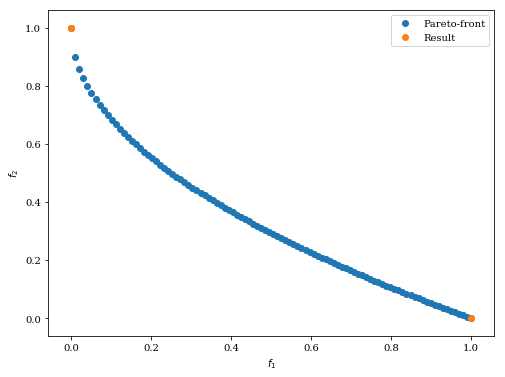

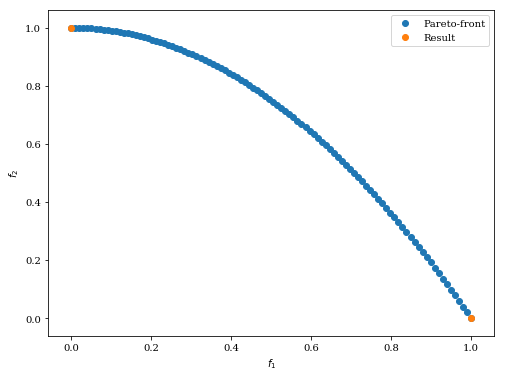

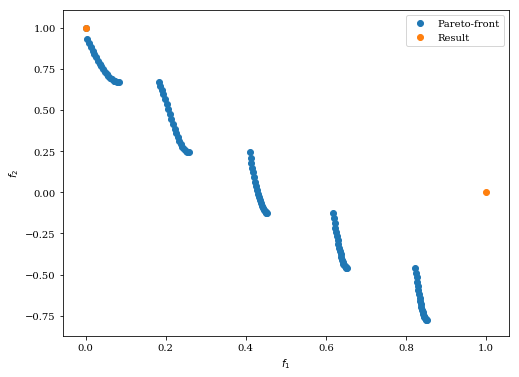

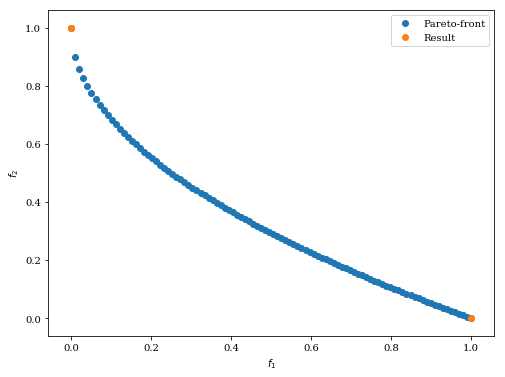

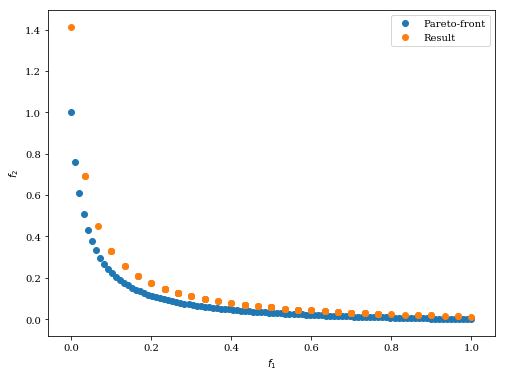

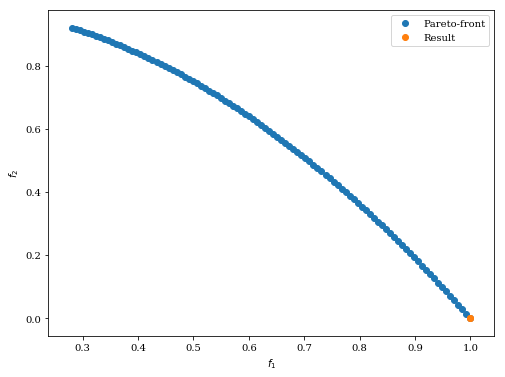

In [6]:
import numpy as np
from pymoo.factory import get_problem
from pymoo.visualization.scatter import Scatter

# The pareto front of a scaled zdt1 problem
pf1 = get_problem("zdt1").pareto_front()
pf2 = get_problem("zdt2").pareto_front()
pf3 = get_problem("zdt3").pareto_front()
pf4 = get_problem("zdt4").pareto_front()
pf5 = get_problem("zdt5").pareto_front()
pf6 = get_problem("zdt6").pareto_front()

# The result found by an algorithm
A1 = res1.F
A2 = res2.F
A3 = res3.F
A4 = res4.F
A5 = res5.F
A6 = res6.F

# plot the result
plot1 = Scatter(legend=True).add(pf1, label="Pareto-front").add(A1, label="Result").show()
plot2 = Scatter(legend=True).add(pf2, label="Pareto-front").add(A2, label="Result").show()
plot3 = Scatter(legend=True).add(pf3, label="Pareto-front").add(A3, label="Result").show()
plot4 = Scatter(legend=True).add(pf4, label="Pareto-front").add(A4, label="Result").show()
plot5 = Scatter(legend=True).add(pf5, label="Pareto-front").add(A5, label="Result").show()
plot6 = Scatter(legend=True).add(pf6, label="Pareto-front").add(A6, label="Result").show()

In [1]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("QualityIndicatorSummary.csv")
data = data[data.IndicatorName == 'Time']

In [19]:
data

,Algorithm,Problem,ExecutionId,IndicatorName,IndicatorValue
90,MOEAD,ZDT1,0,Time,7.419024
91,MOEAD,ZDT1,1,Time,7.914001
92,MOEAD,ZDT1,10,Time,7.983030
93,MOEAD,ZDT1,11,Time,7.365026
94,MOEAD,ZDT1,12,Time,7.191998
95,MOEAD,ZDT1,13,Time,8.103998
96,MOEAD,ZDT1,14,Time,8.029001
97,MOEAD,ZDT1,15,Time,7.233000
98,MOEAD,ZDT1,16,Time,7.859024
99,MOEAD,ZDT1,17,Time,7.606029


In [24]:
MOEAD1 = data[(data['Problem']=='ZDT1') & (data['Algorithm']=='MOEAD')]
MOEAD2 = data[(data['Problem']=='ZDT2') & (data['Algorithm']=='MOEAD')]
MOEAD3 = data[(data['Problem']=='ZDT3') & (data['Algorithm']=='MOEAD')]
MOEAD4 = data[(data['Problem']=='ZDT4') & (data['Algorithm']=='MOEAD')]
MOEAD6 = data[(data['Problem']=='ZDT6') & (data['Algorithm']=='MOEAD')]
NSGAII1 = data[(data['Problem']=='ZDT1') & (data['Algorithm']=='NSGAII')]
NSGAII2 = data[(data['Problem']=='ZDT2') & (data['Algorithm']=='NSGAII')]
NSGAII3 = data[(data['Problem']=='ZDT3') & (data['Algorithm']=='NSGAII')]
NSGAII4 = data[(data['Problem']=='ZDT4') & (data['Algorithm']=='NSGAII')]
NSGAII6 = data[(data['Problem']=='ZDT6') & (data['Algorithm']=='NSGAII')]

In [25]:
print("MOEAD ZDT1: MEAN=",MOEAD1["IndicatorValue"].mean(),"STD=",MOEAD1["IndicatorValue"].std())
print("MOEAD ZDT2: MEAN=",MOEAD2["IndicatorValue"].mean(),"STD=",MOEAD2["IndicatorValue"].std())
print("MOEAD ZDT3: MEAN=",MOEAD3["IndicatorValue"].mean(),"STD=",MOEAD3["IndicatorValue"].std())
print("MOEAD ZDT4: MEAN=",MOEAD4["IndicatorValue"].mean(),"STD=",MOEAD4["IndicatorValue"].std())
print("MOEAD ZDT6: MEAN=",MOEAD6["IndicatorValue"].mean(),"STD=",MOEAD6["IndicatorValue"].std())
print("NSGAII ZDT1: MEAN=",NSGAII1["IndicatorValue"].mean(),"STD=",NSGAII1["IndicatorValue"].std())
print("NSGAII ZDT2: MEAN=",NSGAII2["IndicatorValue"].mean(),"STD=",NSGAII2["IndicatorValue"].std())
print("NSGAII ZDT3: MEAN=",NSGAII3["IndicatorValue"].mean(),"STD=",NSGAII3["IndicatorValue"].std())
print("NSGAII ZDT4: MEAN=",NSGAII4["IndicatorValue"].mean(),"STD=",NSGAII4["IndicatorValue"].std())
print("NSGAII ZDT6: MEAN=",NSGAII6["IndicatorValue"].mean(),"STD=",NSGAII6["IndicatorValue"].std())

MOEAD ZDT1: MEAN= 7.478111545244853 STD= 0.2989183322330092
MOEAD ZDT2: MEAN= 7.029283626874288 STD= 0.3554449023083694
MOEAD ZDT3: MEAN= 7.715457550684611 STD= 0.32240990119854734
MOEAD ZDT4: MEAN= 6.061840558052063 STD= 0.2600336662870516
MOEAD ZDT6: MEAN= 5.343084359169007 STD= 0.24149743241900234
NSGAII ZDT1: MEAN= 20.517149090766907 STD= 0.5843641059189798
NSGAII ZDT2: MEAN= 20.67888641357422 STD= 0.5645889600756999
NSGAII ZDT3: MEAN= 20.61262321472168 STD= 0.5173647946334382
NSGAII ZDT4: MEAN= 20.268117769559225 STD= 1.0470626595072832
NSGAII ZDT6: MEAN= 19.904957437515257 STD= 0.5797201088072962
